In [26]:
import json
import os, cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from matplotlib import pyplot as plt

In [27]:
json_path = '../json/n09835506.json'
img_path = './n09835506_78.JPEG'
img_id = 73
def visualization_bbox1(num_image, json_path,img_path):
    with open(json_path) as annos:
        annotation_json = json.load(annos)

    print('the annotation_json num_key is:',len(annotation_json))  
    print('the annotation_json key is:', annotation_json.keys()) 
    print('the annotation_json num_images is:', len(annotation_json['images'])) 

    image_name = annotation_json['images'][num_image - 1]['file_name']  
    id = annotation_json['images'][num_image - 1]['id']  

    #image_path = os.path.join(img_path, str(image_name)) 
    image = cv2.imread(img_path, 1)  
    num_bbox = 0  

    for i in range(len(annotation_json['annotations'][::])):
        if  annotation_json['annotations'][i-1]['image_id'] == id:
            num_bbox = num_bbox + 1
            x, y, w, h = annotation_json['annotations'][i-1]['bbox']  
            image = cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 255), 2)

    print('The num_bbox of the display image is:', num_bbox)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.show() 


def visualization_seg(num_image, json_path, img_path, str = ' '):
    coco = COCO(json_path)
    
    catIds = coco.getCatIds(catNms=['str']) 
    imgIds = coco.getImgIds(catIds=catIds ) 
    img = coco.loadImgs(imgIds[num_image-1])[0]  

    image_name = img['file_name']
    #image_path = os.path.join(img_path, image_name)
    #image = cv2.imread(img_path + img['file_name'], 1)

    image = cv2.imread(img_path, 1) 
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    coco.showAnns(anns)
    plt.show()

the annotation_json num_key is: 3
the annotation_json key is: dict_keys(['images', 'categories', 'annotations'])
the annotation_json num_images is: 100
The num_bbox of the display image is: 7


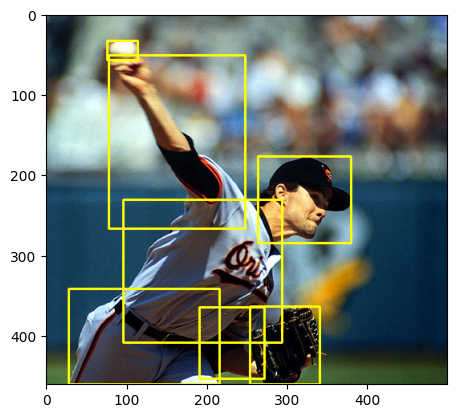

In [28]:
visualization_bbox1(img_id, json_path, img_path)


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


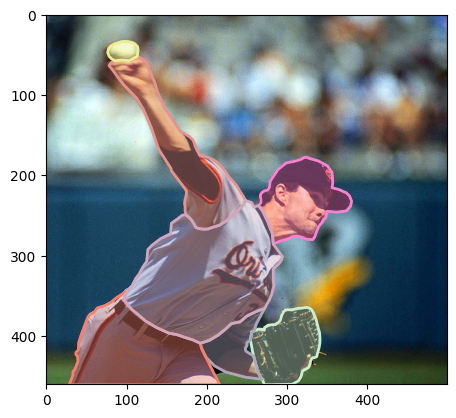

In [29]:
visualization_seg(img_id, json_path, img_path)